# Project - Forest Fire

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

## Read Data

Data source: https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.4

In [2]:
conn = sqlite3.connect("Data/FPA_FOD_20170508.sqlite")
wildfire = pd.read_sql_query ("select * from Fires where FIRE_YEAR>=2010", conn)
wildfire

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1067488,1302561,CDF_2010_56_2229_001566,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,C,36.766944,-121.303056,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xc0\x07\x1bCeS^\xc0...
1,1067489,1302566,CDF_2010_56_2229_001806,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,B,36.776944,-121.311111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xd0\xb7\x92>\xe9S^\...
2,1067490,1302568,CDF_2010_56_2229_001857,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,A,36.856111,-121.381111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe4e\xda\x1fdX^\xc0...
3,1067491,1302570,CDF_2010_56_2229_001897,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,A,36.818056,-121.391111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00T\xa3\xe4\xf6\x07Y^\...
4,1067492,1302576,CDF_2010_56_2229_002326,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,B,36.883056,-121.561944,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x04\xfe\xcf\xe5\xf6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450229,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
450230,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
450231,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
450232,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


## Undserstand the Data

In [3]:
wildfire.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [4]:
#set(wildfire['STATE'])

In [5]:
set(wildfire['STAT_CAUSE_DESCR'])

{'Arson',
 'Campfire',
 'Children',
 'Debris Burning',
 'Equipment Use',
 'Fireworks',
 'Lightning',
 'Miscellaneous',
 'Missing/Undefined',
 'Powerline',
 'Railroad',
 'Smoking',
 'Structure'}

In [6]:
len(wildfire)

450234

### Which state has higher number of wildfires?

In [7]:
fire_year = pd.DataFrame(wildfire['FIRE_YEAR'].value_counts()).reset_index()

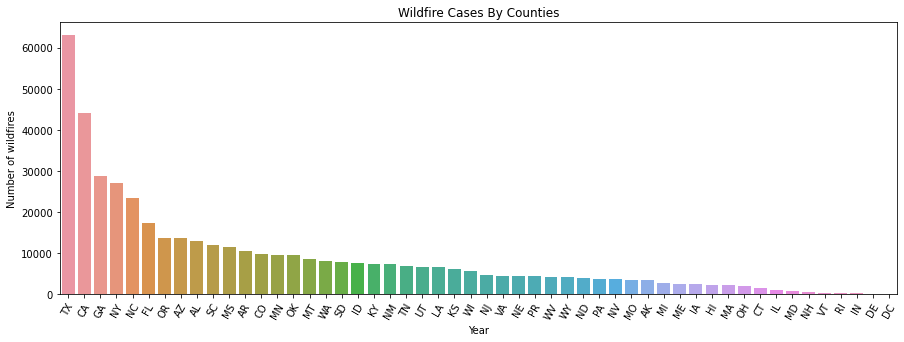

In [8]:
state_wf = wildfire.groupby(['STATE']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=state_wf.index, y=state_wf.values)
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Number of wildfires')
plt.title('Wildfire Cases By Counties')
plt.show()

### For the state with the most wildfires, what are some common reasons?

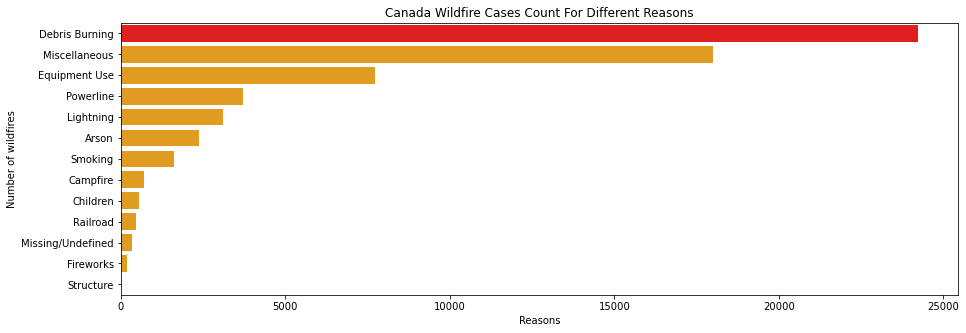

In [9]:
CA_wf = wildfire[wildfire['STATE']=='TX']
df_grouped = CA_wf.groupby(['STAT_CAUSE_DESCR']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
clrs = ['orange' if (x < max(df_grouped.values)) else 'red' for x in df_grouped.values]
sns.barplot(y=df_grouped.index, x=df_grouped.values, orient = 'h', palette=clrs)
plt.xlabel('Reasons')
plt.ylabel('Number of wildfires')
plt.title('Canada Wildfire Cases Count For Different Reasons')
plt.show()

## Population density map
We will use these maps to find the population density based on longitude&latitude

<AxesSubplot:>

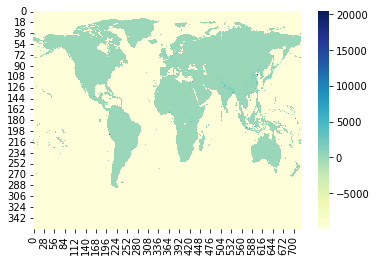

In [10]:
density2010 = pd.read_csv('Data/gpw_v4_population_density_rev11_2010_30_min .asc', sep=' ', header=None)
sns.heatmap(density2010, cmap='YlGnBu')


<AxesSubplot:>

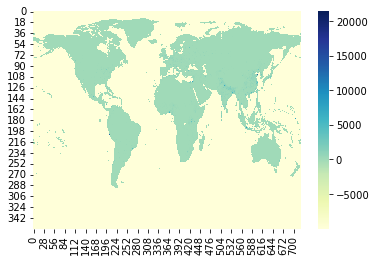

In [11]:
density2015 = pd.read_csv('Data/gpw_v4_population_density_rev11_2015_30_min .asc', sep=' ', header=None)
sns.heatmap(density2015, cmap='YlGnBu')

In [12]:
# pop_density = pd.read_csv('DATA/gpw_v4_population_density_rev11_2020_30_min.asc', delimiter=' ', header=None)
# pop_density = pop_density.iloc[: , :-1]
# pop_density

In [13]:
to_nearest_half = lambda x: int(x)+0.5 if x-int(x) > 0.5 else int(x)
array_loc = wildfire[['LATITUDE', 'LONGITUDE']]
array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(to_nearest_half)
array_loc['LONGITUDE'] = array_loc['LONGITUDE'].apply(to_nearest_half)
array_loc[['LATITUDE', 'LONGITUDE']]

C:\Users\12933\AppData\Local\Temp\ipykernel_8260\1697708642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(to_nearest_half)
C:\Users\12933\AppData\Local\Temp\ipykernel_8260\1697708642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LONGITUDE'] = array_loc['LONGITUDE'].apply(to_nearest_half)


,LATITUDE,LONGITUDE
0,36.5,-121
1,36.5,-121
2,36.5,-121
3,36.5,-121
4,36.5,-121
...,...,...
450229,40.0,-122
450230,37.5,-120
450231,37.5,-120
450232,37.5,-120


In [14]:

array_loc['LATITUDE']=array_loc['LATITUDE'].apply(lambda x:int(179-x*2))
array_loc['LONGITUDE']=array_loc['LONGITUDE'].apply(lambda x:int(359+x*2))

def map_density(x):
    # density =pop_density.iloc[x[0],x[1]]
    
    # return pop_density.iloc[x[0],x[1]]
    v2010 = density2010.iloc[x[0],x[1]]
    v2015 = density2015.iloc[x[0],x[1]]
    if v2010 != -9999.0 and v2015 != -9999.0:
        return (v2010 + v2015)/2
    elif v2010 == -9999.0 and v2015 != -9999.0:
        return v2015
    elif v2010 != -9999.0 and v2015 == -9999.0:
        return v2010
    else:
        return -9999.0

array_loc['pop_density'] = array_loc[['LATITUDE', 'LONGITUDE']].apply(map_density, 1)
array_loc


C:\Users\12933\AppData\Local\Temp\ipykernel_8260\53775832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LATITUDE']=array_loc['LATITUDE'].apply(lambda x:int(179-x*2))
C:\Users\12933\AppData\Local\Temp\ipykernel_8260\53775832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LONGITUDE']=array_loc['LONGITUDE'].apply(lambda x:int(359+x*2))
C:\Users\12933\AppData\Local\Temp\ipykernel_8260\53775832.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,LATITUDE,LONGITUDE,pop_density
0,106,117,23.98267
1,106,117,23.98267
2,106,117,23.98267
3,106,117,23.98267
4,106,117,23.98267
...,...,...,...
450229,99,115,34.81139
450230,104,119,15.89982
450231,104,119,15.89982
450232,104,119,15.89982


In [15]:
wildfire['population_density'] = array_loc['pop_density']
wildfire

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,population_density
0,1067488,1302561,CDF_2010_56_2229_001566,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,36.766944,-121.303056,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xc0\x07\x1bCeS^\xc0...,23.98267
1,1067489,1302566,CDF_2010_56_2229_001806,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,36.776944,-121.311111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xd0\xb7\x92>\xe9S^\...,23.98267
2,1067490,1302568,CDF_2010_56_2229_001857,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,36.856111,-121.381111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe4e\xda\x1fdX^\xc0...,23.98267
3,1067491,1302570,CDF_2010_56_2229_001897,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,36.818056,-121.391111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00T\xa3\xe4\xf6\x07Y^\...,23.98267
4,1067492,1302576,CDF_2010_56_2229_002326,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,36.883056,-121.561944,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x04\xfe\xcf\xe5\xf6...,23.98267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450229,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...,34.81139
450230,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,15.89982
450231,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,15.89982
450232,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...,15.89982


## Heatmap of population density at wildfire location

In [16]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

C:\Users\12933\AppData\Local\Temp\ipykernel_8260\919660779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(lambda x: -x)


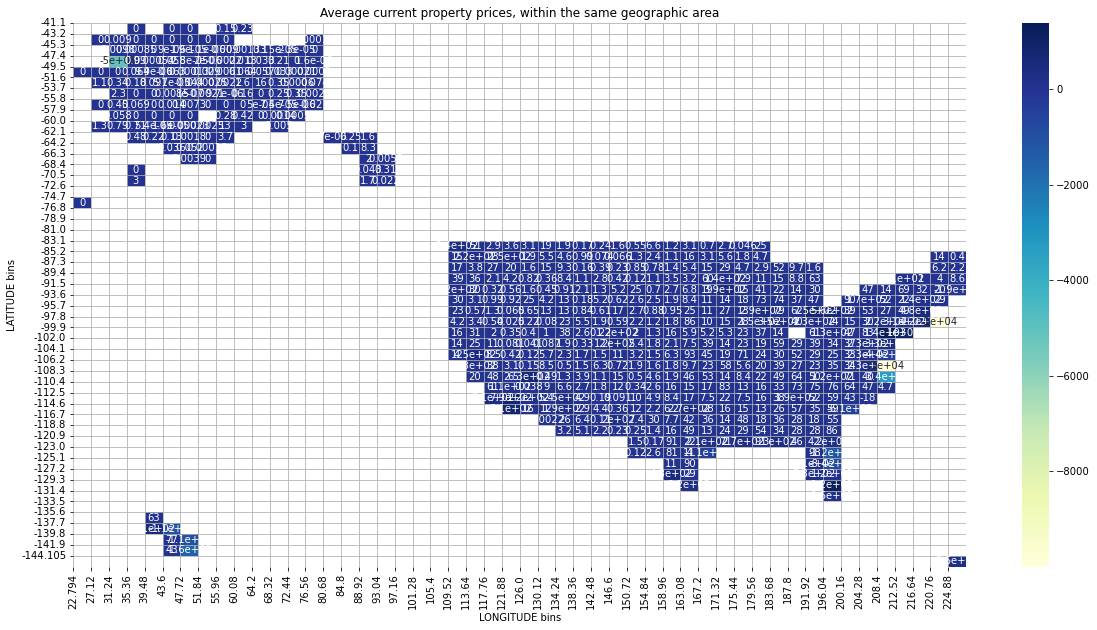

In [17]:
field = 'pop_density'
fieldsxy = ['LONGITUDE', 'LATITUDE']
ncuts = 50
array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(lambda x: -x)
with plt.rc_context({'figure.figsize': (20,10)}):    
    # TODO -- write your code here ---
    means = heatmap_bins(array_loc, fieldsxy, ncuts)  
    sns.heatmap(means[field], annot=True, cmap='YlGnBu')
    xticklabels = means[field].columns.map(lambda x : x.left)
    yticklabels = means[field].index.map(lambda x : x.left)
    locs = range(ncuts)
    plt.title('average current property prices, within the same geographic area'.capitalize())
    plt.xticks(locs, xticklabels)
    plt.yticks(locs, yticklabels)
    plt.grid()
    plt.show()

In [19]:
wildfire.to_csv('DATA/population.csv')